In [1]:
import os, sys
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import importlib.util
import joblib

# Get current path from where script is executed
if os.name == 'nt':
    sep = '\\'
elif os.name == 'posix':
    sep = '/'
else:
    print(f'What is this OS? {os.name}')

path = os.getcwd()
pathToSrc =  path[:path.find('src')+3]
pathToGDrive =  path[:path.find('Code')]
path_datasets = pathToGDrive + f'DataSets{sep}'

pathToDataSet = pathToGDrive + f'DataSets{sep}' + 'dataset_final.csv'
df = pd.read_csv(pathToDataSet)


#MapGenerator Lib
path_maps = path + f'{sep}mapGeneration{sep}mapGeneration.py'
spec = importlib.util.spec_from_file_location("mapGeneration", path_maps)
mp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(mp)


# Neural Network

In [2]:
from keras.models import model_from_json
path_new = pathToSrc + f'{sep}models{sep}neuralNet{sep}'

# load json and create model
json_file = open(path_new + 'model_neural_network.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_neural_network = model_from_json(loaded_model_json)
# load weights into new model
model_neural_network.load_weights(path_new + "model_neural_network.h5")
print("Loaded model from disk")

Using TensorFlow backend.


Loaded model from disk


In [3]:
# import functions
path_to_model = pathToSrc + f'{sep}models{sep}neuralNet{sep}neural_network.py'
spec = importlib.util.spec_from_file_location("neuralNet", path_to_model)
neuralNet = importlib.util.module_from_spec(spec)
spec.loader.exec_module(neuralNet)
print('functions loaded')

functions loaded


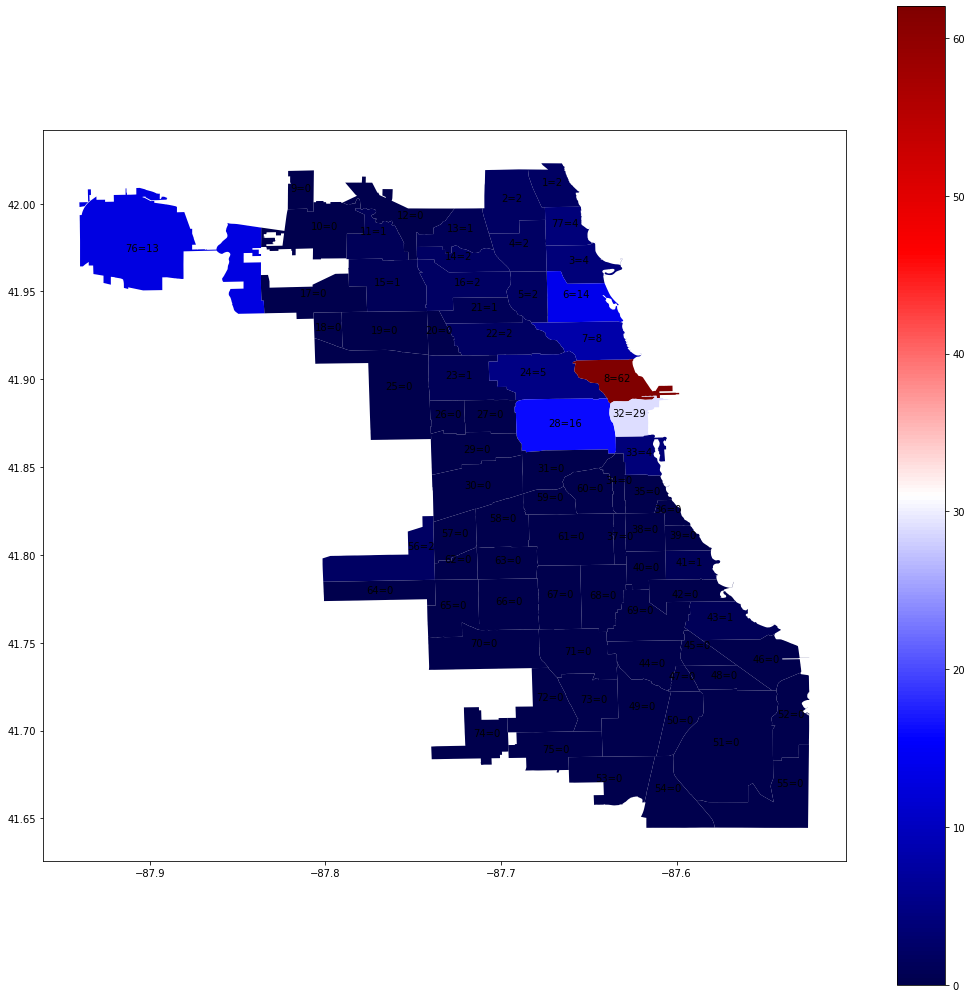

In [4]:
# Test
date = "2019-11-16 16:00:00"
X = neuralNet.TransformDataToX(df, date)
# Predict
Y = model_neural_network.predict(X)
prediction = neuralNet.TransformYToResult(Y)
mp.mapGenerator(prediction)

# Random Forest

In [2]:
# RandomForest 
model_randomForest = joblib.load(path_datasets+"/model/randomforest.pkl")

path_to_model = pathToSrc + f'{sep}models{sep}/randomForest/randomForest.py'
spec = importlib.util.spec_from_file_location("randomForest", path_to_model)
randomForest = importlib.util.module_from_spec(spec)
spec.loader.exec_module(randomForest)

In [3]:
pathToDataSet = pathToGDrive + f'DataSets{sep}data_prediction{sep}' + 'pred.csv'
df = pd.read_csv(pathToDataSet)
df = df.drop(columns=['Unnamed: 0'],axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


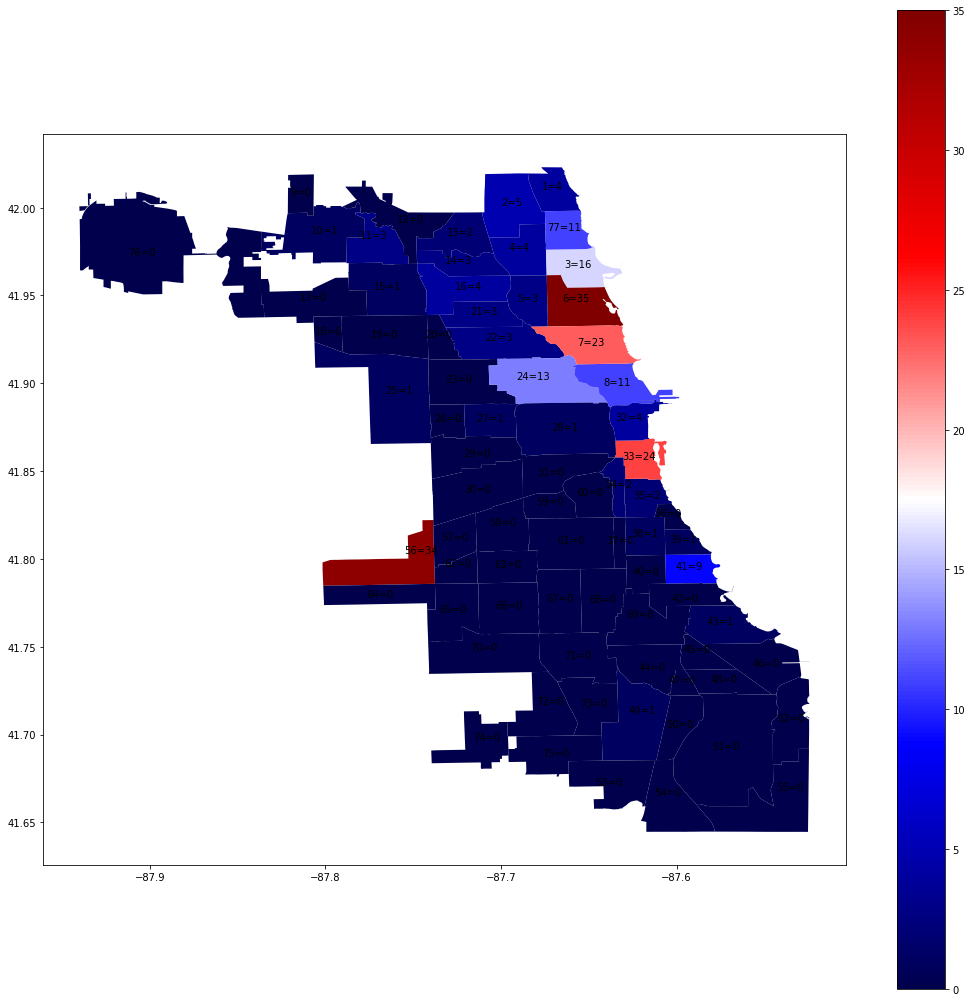

In [4]:
date = "2019-12-16 16:00:00"#getDate from request.form.values:
#row = df[df['trip_start_timestamp'] == date].iloc[0,]

# Transform to array X
X = randomForest.TransformDataToX(df, date)


# Predict
Y = model_randomForest.predict(X)
#prediction = np.random.randint(1,200,77)
# Create map

prediction = randomForest.TransformYToResult(Y)

# Create map
mp.mapGenerator(prediction)